<a href="https://colab.research.google.com/github/peeka-boo0/ml-learning-journey/blob/main/notebooks/Day_15_01ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

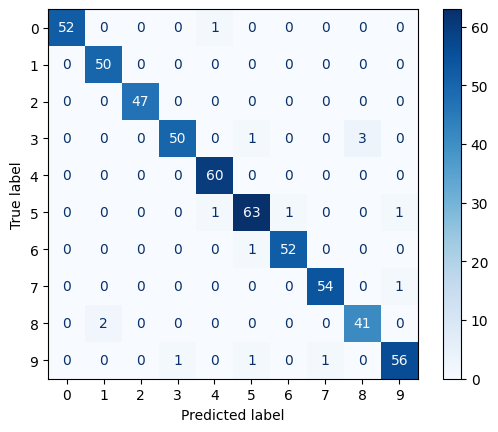

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        50
           2       1.00      1.00      1.00        47
           3       0.98      0.93      0.95        54
           4       0.97      1.00      0.98        60
           5       0.95      0.95      0.95        66
           6       0.98      0.98      0.98        53
           7       0.98      0.98      0.98        55
           8       0.93      0.95      0.94        43
           9       0.97      0.95      0.96        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, auc, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Load data
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
rf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap="Blues")
plt.show()

# Precision, Recall, F1
print(classification_report(y_test, y_pred))


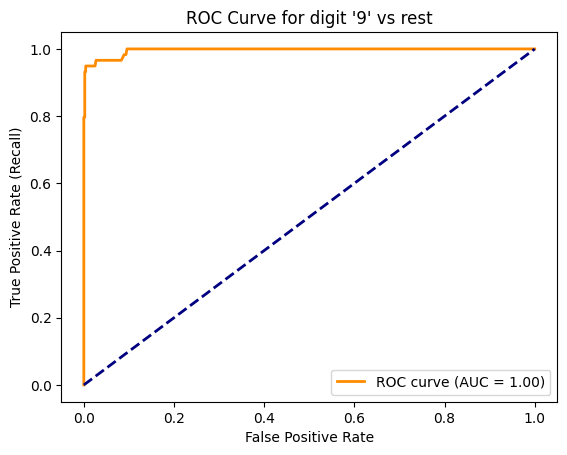

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_curve, auc, roc_auc_score,
    confusion_matrix, classification_report, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# Load data
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.3, random_state=42
)

# Train model
clf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# --- ROC & AUC for one-vs-rest ---
# Let's check how well the classifier distinguishes digit "9" from all others
from sklearn.preprocessing import label_binarize

# Convert y_test into binary: is it 9 or not?
y_test_bin = (y_test == 9).astype(int)

# Get predicted probabilities for class "9"
y_score = clf.predict_proba(X_test)[:, 9]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test_bin, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")  # diagonal
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve for digit '9' vs rest")
plt.legend(loc="lower right")
plt.show()
